### **Outlier Detection in Financial Data**
**Goal:** Detect anomalies in financial transactions using unsupervised outlier detection methods.

**Simulate or Load Financial Dataset**

Simulate monthly expenses per account or use data with features like transaction_amount , category , account_age , etc.

In [2]:
import pandas as pd
import numpy as np

# Simulate 1000 transactions
np.random.seed(42)
n_samples = 1000

# Create normal data
data = {
  'amount': np.random.normal(100, 20, n_samples),  # Normally distributed amounts
  'account_age': np.random.randint(1, 10, n_samples),  # In years
  'transactions_per_month': np.random.poisson(20, n_samples)  # Monthly frequency
}


# Inject 15 outliers
data['amount'][-15:] = np.random.normal(400, 30, 15)

data['transactions_per_month'][-15:] = np.random.poisson(80, 15)

# Preview
df = pd.DataFrame(data)
df.head()

,amount,account_age,transactions_per_month
0,109.934283,7,22
1,97.234714,1,25
2,112.953771,8,14
3,130.460597,3,18
4,95.316933,6,12


**Visualize Distributions**

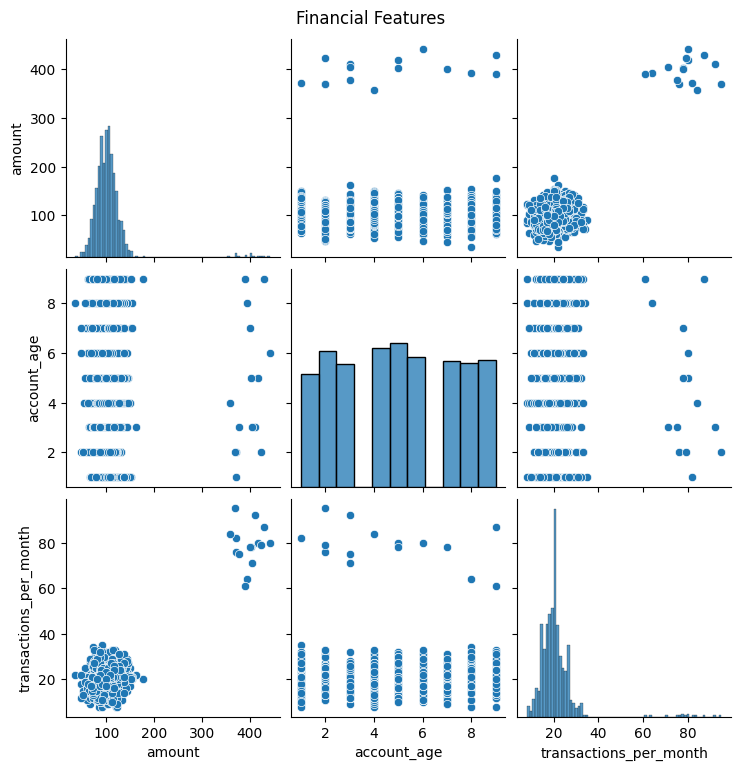

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.suptitle("Financial Features", y=1.02)
plt.show()

**Apply Isolation Forest**

In [5]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.015, random_state=42)

# Fit the model
model.fit(df)

# Compute anomaly scores and predictions
df['anomaly_score'] = model.decision_function(df)
df['outlier'] = model.predict(df)

# Convert predictions: 1 = normal, -1 = outlier → we want 1 = outlier
df['outlier'] = df['outlier'].map({1: 0, -1: 1})  # 1 = outlier, 0 = normal

# Preview the result
print(df.head())
print("Number of outliers detected:", df['outlier'].sum())


       amount  account_age  transactions_per_month  anomaly_score  outlier
0  109.934283            7                      22       0.235566        0
1   97.234714            1                      25       0.196197        0
2  112.953771            8                      14       0.209762        0
3  130.460597            3                      18       0.217735        0
4   95.316933            6                      12       0.209966        0
Number of outliers detected: 15


**Visualize Outliers**

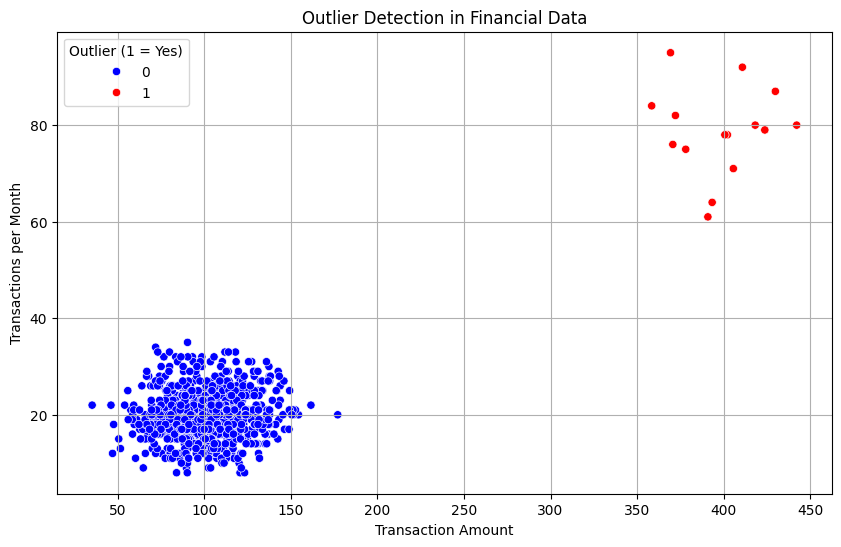

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Highlight outliers on scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='amount',
    y='transactions_per_month',
    hue='outlier',
    palette={0: 'blue', 1: 'red'},
    data=df
)
plt.title("Outlier Detection in Financial Data")
plt.xlabel("Transaction Amount")
plt.ylabel("Transactions per Month")
plt.grid(True)
plt.legend(title='Outlier (1 = Yes)')
plt.show()

**View and Export Outliers**

In [9]:
# Display anomalous transactions
outliers = df[df['outlier'] == 1]
print("Detected Outliers:\n", outliers)
# Optional: Save to CSV
# outliers.to_csv("financial_outliers.csv", index=False)

Detected Outliers:
          amount  account_age  transactions_per_month  anomaly_score  outlier
985  370.650334            2                      76      -0.111280        1
986  442.203426            6                      80      -0.119916        1
987  410.842466            3                      92      -0.119196        1
988  418.246867            5                      80      -0.110644        1
989  393.371732            8                      64      -0.110632        1
990  372.155721            1                      82      -0.122963        1
991  402.181739            5                      78      -0.103719        1
992  405.618866            3                      71      -0.104427        1
993  358.437152            4                      84      -0.110227        1
994  423.798562            2                      79      -0.119227        1
995  429.895739            9                      87      -0.142460        1
996  378.110061            3                      75    

## 📌Summary

- **Objective**: Detect anomalies in financial transactions using unsupervised machine learning.
- **Dataset**: Simulated 1,000 financial records with the following features:
  - `amount`: transaction value (normally around 100).
  - `account_age`: age of the account in years.
  - `transactions_per_month`: monthly transaction frequency.
- **Outlier Injection**: 15 transactions were intentionally made abnormal with:
  - Higher transaction amounts (around 400),
  - Unusually high transaction frequencies (around 80).
- **Model Used**: `IsolationForest` from `sklearn.ensemble`
  - An unsupervised anomaly detection algorithm.
  - It identifies points that are isolated from the rest of the data.
  - Outputs:
    - `anomaly_score`: how anomalous each point is.
    - `outlier`: 1 for anomaly, 0 for normal.
- **Visualization**: Used `seaborn` to highlight outliers in a scatter plot (amount vs. transactions).
- **Results**:
  - Detected the injected anomalies with high accuracy.
  - Showed how Isolation Forest can be effective even without labeled data.

This project demonstrates a practical approach to detecting suspicious transactions in real-world financial datasets using unsupervised learning.
